In [241]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from collections import namedtuple
from IPython.display import display

In [242]:


df = pd.read_csv("YOUR_DATA_DIRECTORY", encoding='latin1')



In [243]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [245]:
#We are changing the datatype for column 'Duration'
df['Duration']= df['Duration'].str.replace('min','').apply(pd.to_numeric)

#changing datatype with some string replacing
df["Votes"]=df["Votes"].replace("$5.16M", 516)
df["Votes"] = pd.to_numeric(df['Votes'].str.replace(',',''))

In [246]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [247]:
df.shape

(15509, 10)

In [248]:
df.describe 

<bound method NDFrame.describe of                                      Name    Year  Duration            Genre  \
0                                             NaN       NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)     109.0            Drama   
2                             #Homecoming  (2021)      90.0   Drama, Musical   
3                                 #Yaaram  (2019)     110.0  Comedy, Romance   
4                       ...And Once Again  (2010)     105.0            Drama   
...                                   ...     ...       ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)       NaN           Action   
15505                               Zulmi  (1999)     129.0    Action, Drama   
15506                           Zulmi Raj  (2005)       NaN           Action   
15507                       Zulmi Shikari  (1988)       NaN           Action   
15508                        Zulm-O-Sitam  (1998)     130.0    Action, Drama   

     

In [249]:
df['Genre'].nunique()

485

In [250]:
df['Genre'].head(10)

0                        Drama
1                        Drama
2               Drama, Musical
3              Comedy, Romance
4                        Drama
5       Comedy, Drama, Musical
6          Drama, Romance, War
7                  Documentary
8    Horror, Mystery, Thriller
9      Action, Crime, Thriller
Name: Genre, dtype: object

In [251]:
df['Year'].nunique()

102

In [252]:
df.Year.unique()

array([nan, '(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)',
       '(2012)', '(2014)', '(2004)', '(2016)', '(1991)', '(1990)',
       '(2018)', '(1987)', '(1948)', '(1958)', '(2017)', '(2020)',
       '(2009)', '(2002)', '(1993)', '(1946)', '(1994)', '(2007)',
       '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)',
       '(1974)', '(2015)', '(2006)', '(1981)', '(1985)', '(2011)',
       '(2001)', '(1967)', '(1988)', '(1995)', '(1959)', '(1996)',
       '(1970)', '(1976)', '(2000)', '(1999)', '(1973)', '(1968)',
       '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)',
       '(1977)', '(1957)', '(1950)', '(1992)', '(1969)', '(1975)',
       '(1947)', '(1972)', '(1971)', '(1935)', '(1978)', '(1960)',
       '(1944)', '(1963)', '(1940)', '(1984)', '(1934)', '(1955)',
       '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)',
       '(1952)', '(1933)', '(1942)', '(1939)', '(1954)', '(1945)',
       '(1961)', '(1965)', '(1938)', '(1941)', '(1931)', 

In [253]:
df.Rating.unique()  

array([ nan,  7. ,  4.4,  4.7,  7.4,  5.6,  4. ,  6.2,  5.9,  6.5,  5.7,
        6.3,  7.2,  6.6,  7.3,  7.1,  6.9,  3.5,  5. ,  4.5,  6.4,  4.1,
        4.8,  8.1,  5.5,  6.8,  6.1,  7.7,  5.1,  7.6,  3.1,  3.3,  7.8,
        8.4,  5.2,  4.3,  5.8,  4.6,  7.5,  6.7,  3.6,  3.9,  5.4,  4.2,
        5.3,  3.4,  3. ,  8. ,  6. ,  3.8,  7.9,  2.7,  4.9,  2.4,  3.7,
        3.2,  2.5,  2.8,  2.6,  2.9,  8.2,  8.7,  8.3,  9.3,  8.8,  2.1,
        2.3,  8.5,  8.6,  9. ,  9.6,  1.7,  9.1,  2. ,  1.4,  8.9,  1.9,
        9.4,  9.7,  1.8,  9.2,  1.6, 10. ,  2.2,  1.1])

In [254]:
df['Duration'].unique()

array([ nan, 109.,  90., 110., 105., 147., 142.,  59.,  82., 116.,  96.,
       120., 161., 166., 102.,  87., 132.,  66., 146., 112., 168., 158.,
       126.,  94., 138., 124., 144., 157., 136., 107., 113.,  80., 122.,
       149., 148., 130., 121., 188., 115., 103., 114., 170., 100.,  99.,
       140., 128.,  93., 125., 145.,  75., 111., 134.,  85., 104.,  92.,
       137., 127., 150., 119., 135.,  86.,  76.,  70.,  72., 151.,  95.,
        52.,  89., 143., 177., 117., 123., 154.,  88., 175., 153.,  78.,
       139., 133., 101., 180.,  60.,  46., 164., 162., 171., 160., 152.,
        62., 163., 165., 141., 210., 129., 156., 240., 172., 155., 118.,
       167., 106., 193.,  57., 108.,  45., 195., 174.,  81., 178.,  58.,
       184.,  97.,  98., 131., 176., 169.,  77.,  91.,  84., 173.,  74.,
        67., 181., 300.,  79.,  65.,  48., 183., 159.,  83.,  68.,  49.,
       201.,  64., 186.,  50.,  69., 207.,  55.,  61., 185., 187., 216.,
        63.,  54., 198.,  51.,  71.,  73., 218., 19

In [255]:
df.groupby(['Genre']).count()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
Genre,,,,,,,,,
Action,1289,1265,262,417,417,1249,1207,1124,1005
"Action, Adventure",41,41,17,24,24,41,40,39,39
"Action, Adventure, Biography",1,1,1,1,1,1,1,1,1
"Action, Adventure, Comedy",42,41,37,40,40,42,42,42,42
"Action, Adventure, Crime",19,19,11,16,16,19,19,19,19
...,...,...,...,...,...,...,...,...,...
"Thriller, Action",2,2,1,1,1,2,2,2,2
"Thriller, Musical, Mystery",1,1,1,1,1,1,1,1,1
"Thriller, Mystery",3,3,2,3,3,3,3,3,3


In [256]:
df["Director"].value_counts()


Director
Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
                    ..
Naeem Siddiqui       1
Shadaab Khan         1
Mystelle Brabbee     1
Kunal Shivdasani     1
Kiran Thej           1
Name: count, Length: 5938, dtype: int64

In [257]:
df.isnull().any()

Name        False
Year         True
Duration     True
Genre        True
Rating       True
Votes        True
Director     True
Actor 1      True
Actor 2      True
Actor 3      True
dtype: bool

In [258]:
#printing Total null Values for the column Year and Genre
print('Null Values in Year Column',df['Year'].isnull().sum())
print('Null Values in Genre Column',df['Genre'].isnull().sum())

Null Values in Year Column 528
Null Values in Genre Column 1877


In [259]:
#Dropping null values
df.dropna(subset=['Year'],inplace=True)
df.dropna(subset=['Genre'],inplace=True)

#Checking Null Values again for confirmation. you can also skip the unnessasary stpes here and in above cell
print('Null Values in Year Column',df['Year'].isnull().sum())
print('Null Values in Genre Column',df['Genre'].isnull().sum())

Null Values in Year Column 0
Null Values in Genre Column 0


In [260]:
#replacing null values with the most common rating given to an Indian Movie
df['Rating'].fillna(df['Rating'].mode().max(),inplace=True)

#replacing null values with average duration of a movie in India
df['Duration'].fillna(df['Duration'].mean(),inplace=True)

#replacing null values with average votes recived by a Movie
df['Votes'].fillna(df['Votes'].mean(),inplace=True)

In [261]:
df.isnull().any()

Name        False
Year        False
Duration    False
Genre       False
Rating      False
Votes       False
Director     True
Actor 1      True
Actor 2      True
Actor 3      True
dtype: bool

In [262]:
df.duplicated().sum()


4

In [263]:
def Talents(column):
    global df
    df[column].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Top Ten {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

In [264]:
def Histo(column):
    global df
    plt.figure(figsize=(20,6))
    plt.hist(df[column], edgecolor="k")
    plt.xticks(rotation=90)
    plt.title("Histogram of {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [265]:
def Scatter(x, y, c=None):
    global df
    plt.figure(figsize=(20,6))
    plt.scatter(df[x], df[y], edgecolor="k", c=c)
    plt.xticks(rotation=0)
    plt.title("Scatter plot X:{} / Y:{}".format(x, y))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()   

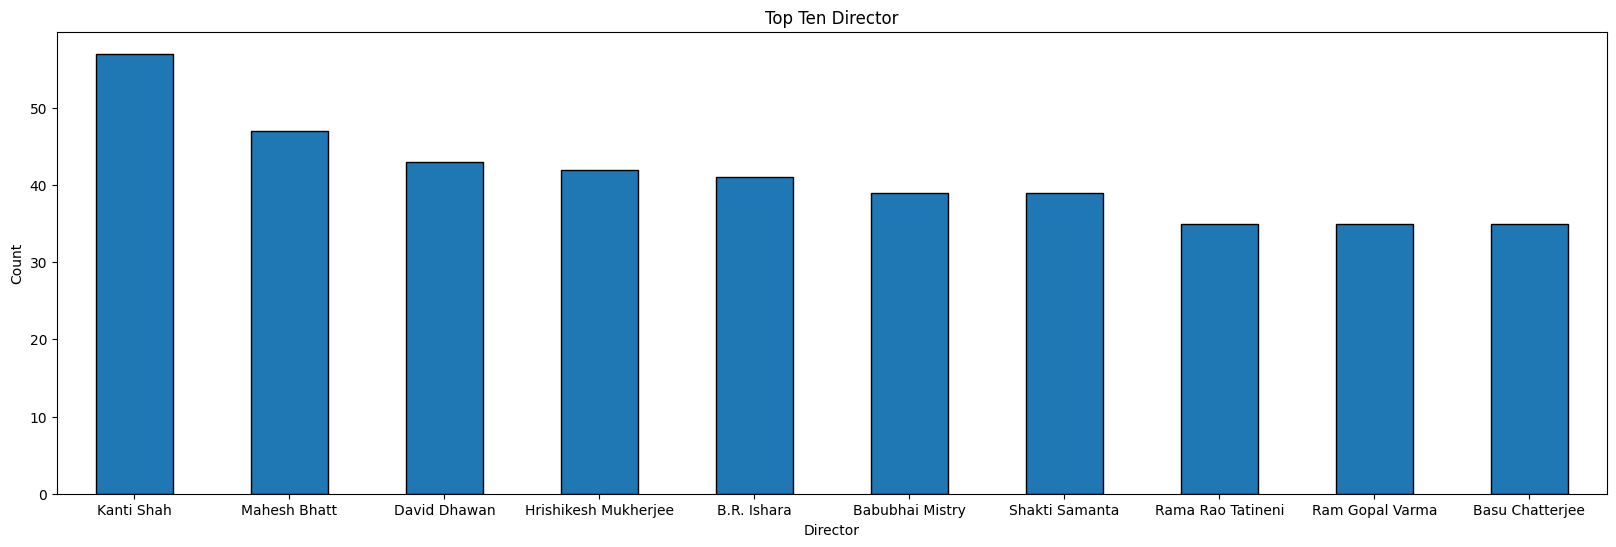

In [266]:
Talents("Director")

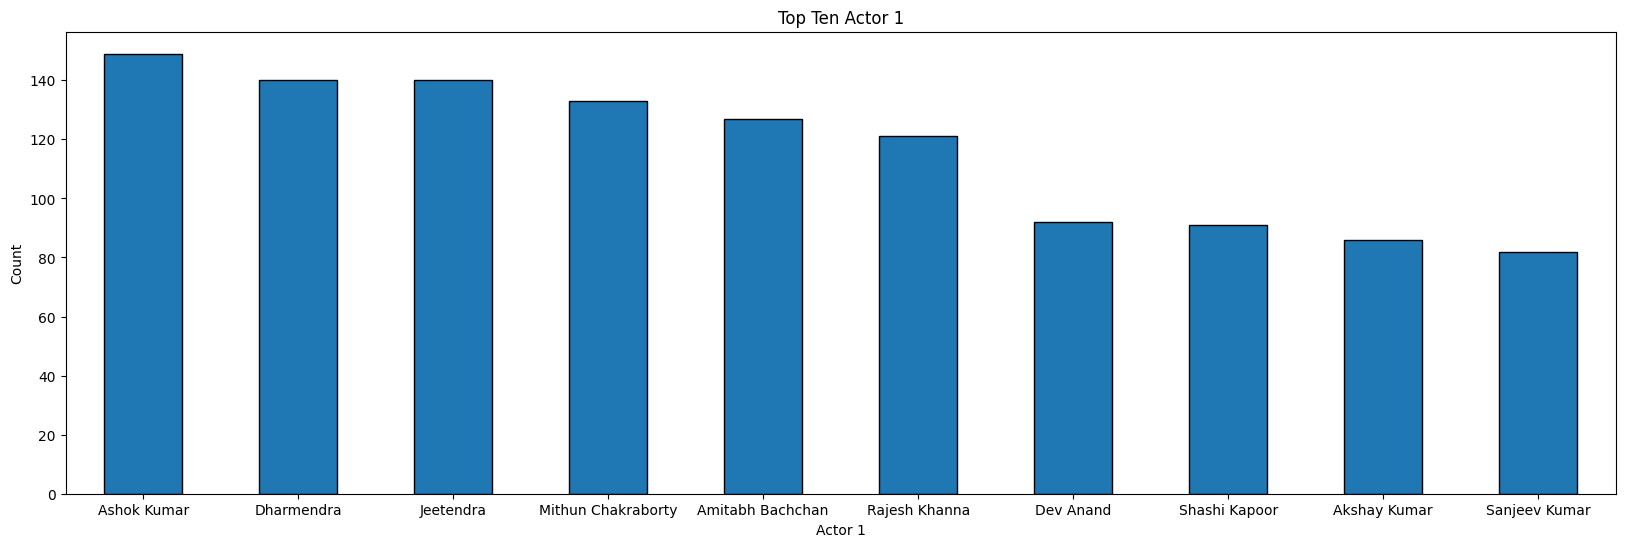

In [267]:
Talents("Actor 1")

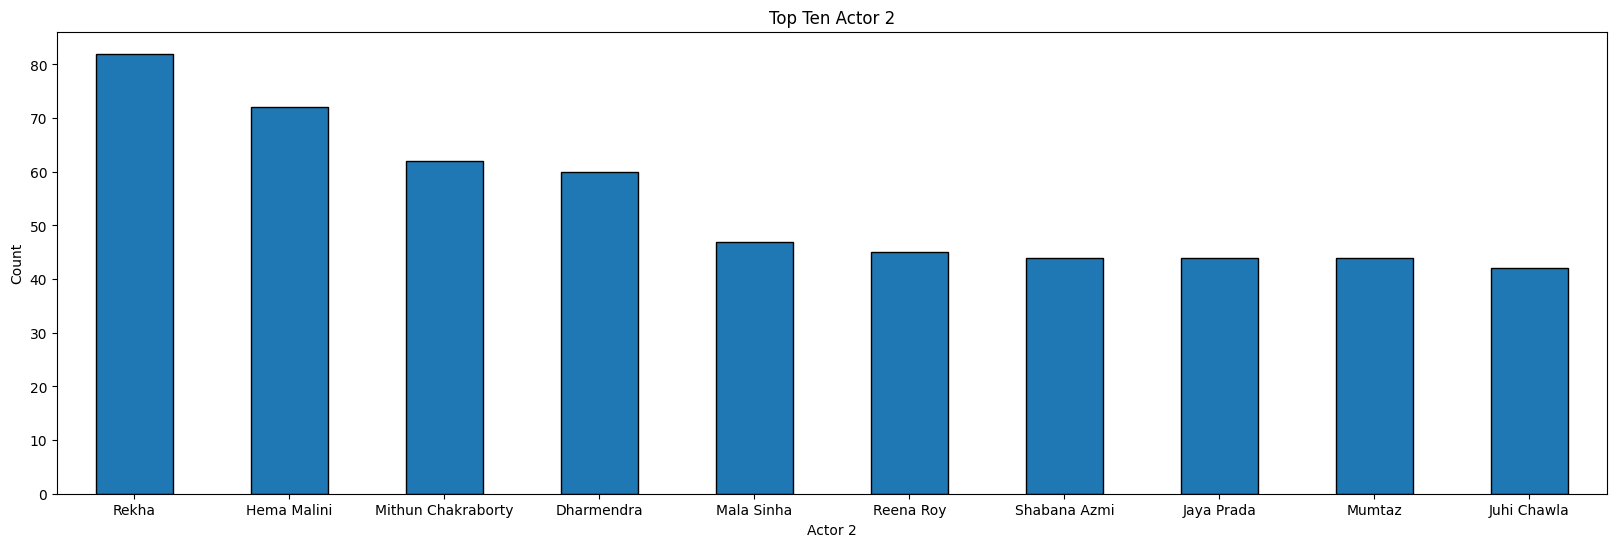

In [268]:
Talents("Actor 2")

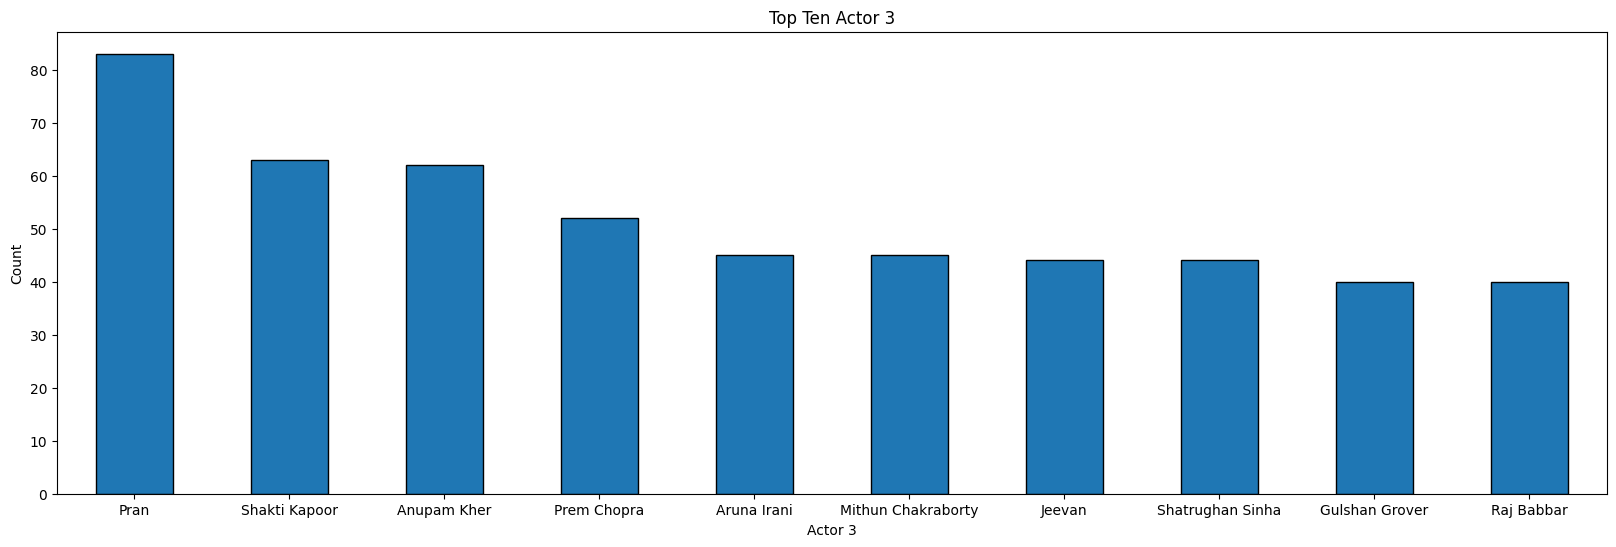

In [269]:
Talents("Actor 3")

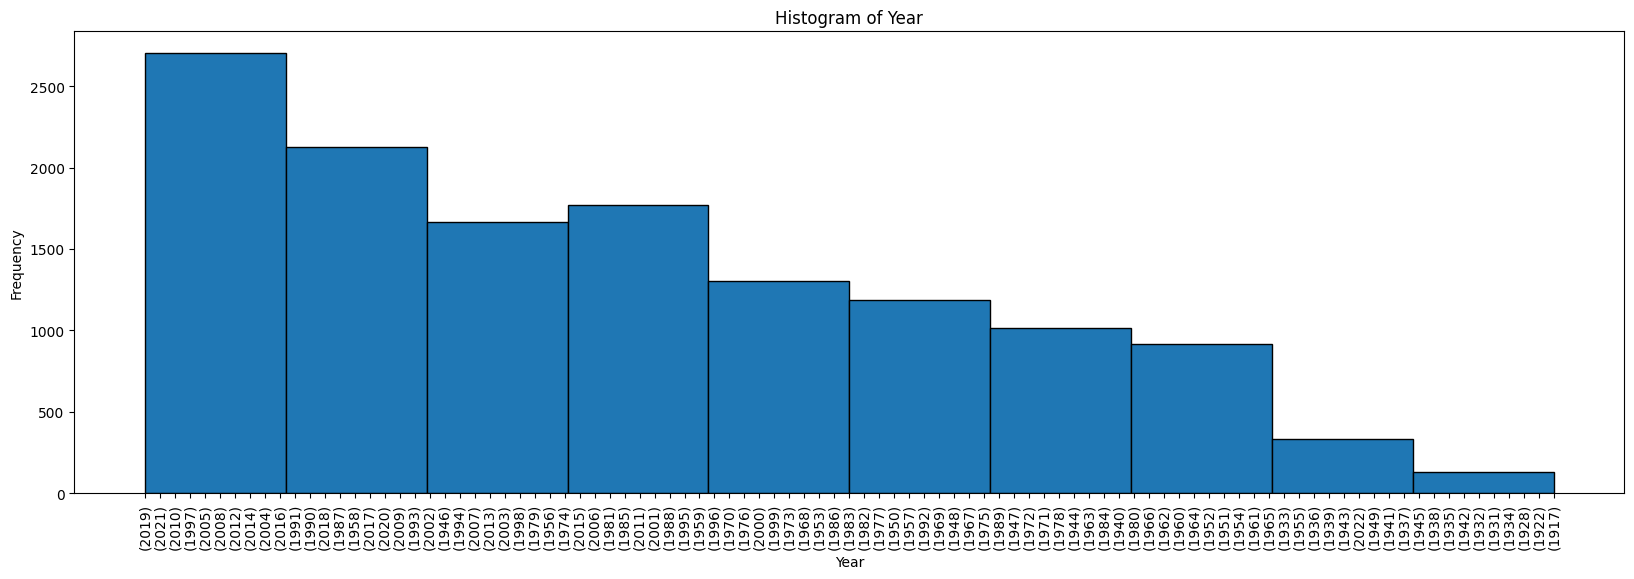

In [270]:
Histo("Year")

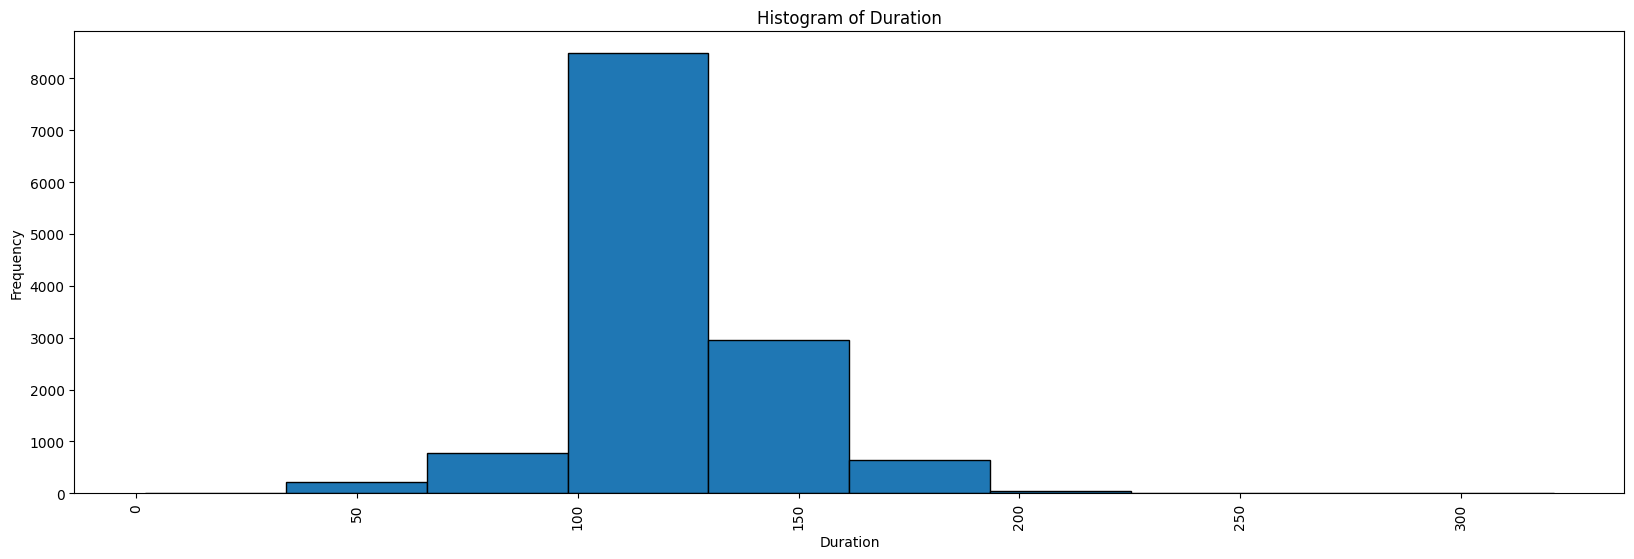

In [271]:
Histo("Duration")

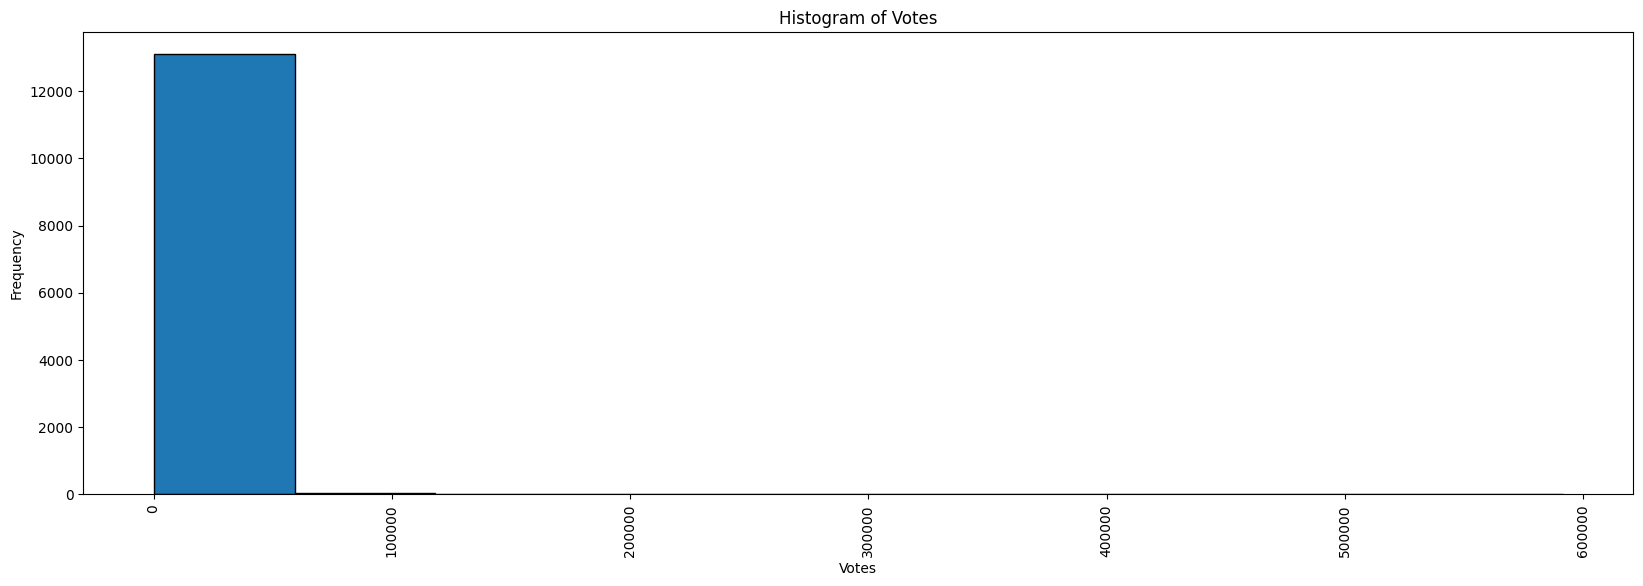

In [272]:
Histo("Votes")

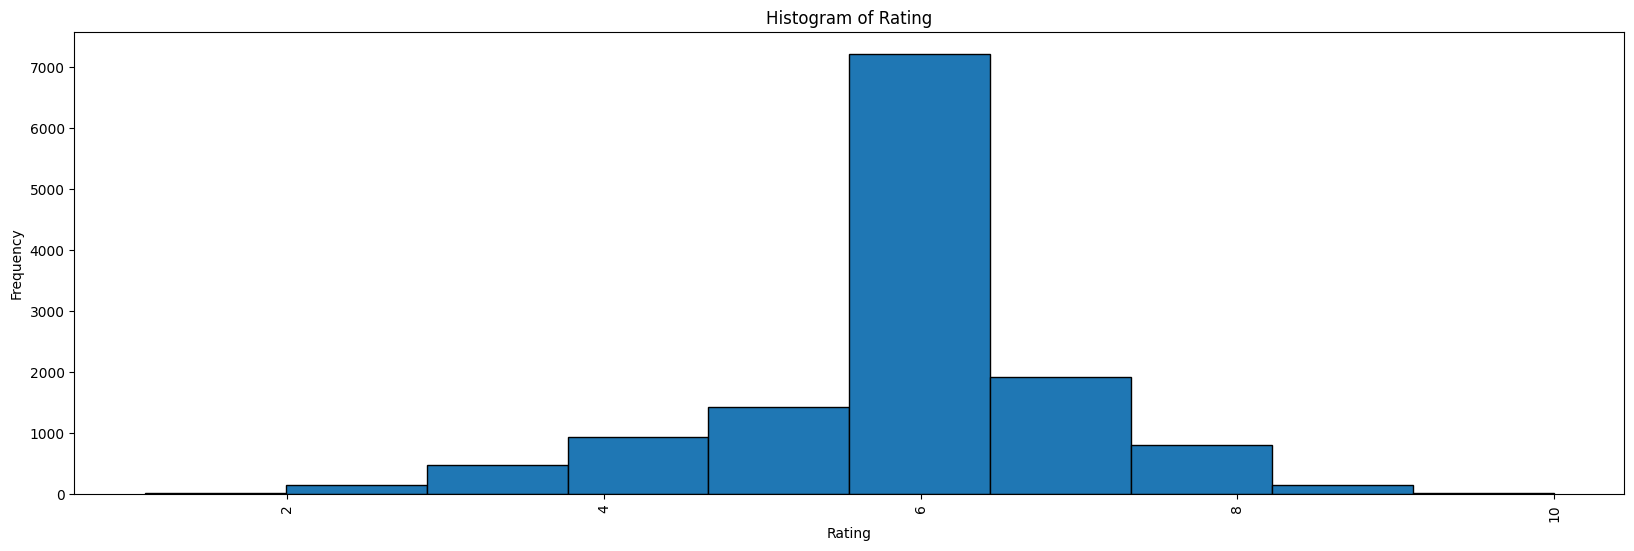

In [273]:
Histo("Rating")

In [274]:
import matplotlib.pyplot as plt
from itertools import combinations

def plot_histograms(data, col1, col2):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(data[col1], bins=20, color='skyblue')
    plt.title(col1)

    plt.subplot(1, 2, 2)
    plt.hist(data[col2], bins=20, color='salmon')
    plt.title(col2)

    plt.tight_layout()
    plt.show()



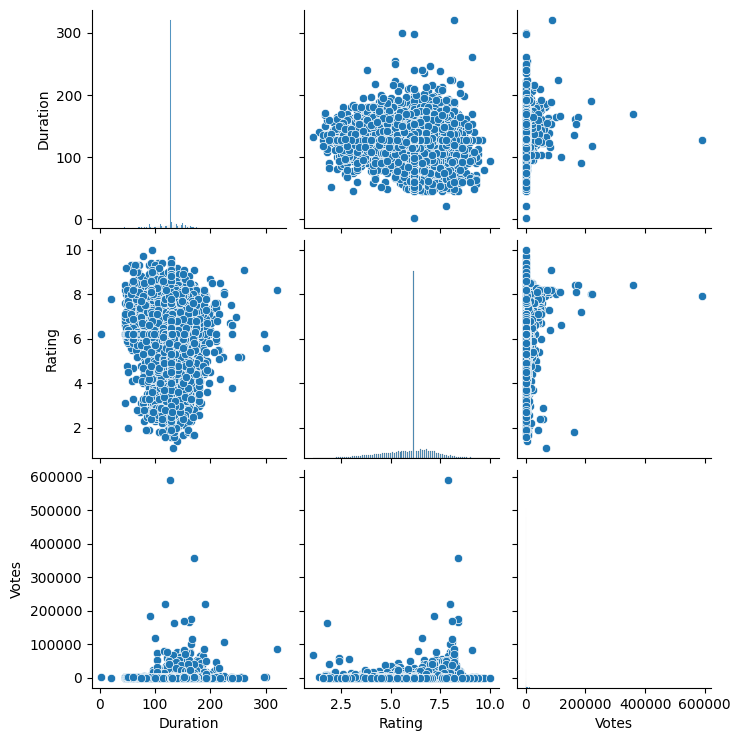

In [275]:
import seaborn as sns

sns.pairplot(df)
plt.show()


In [276]:
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
print(non_numeric_columns)


Index(['Name', 'Year', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], dtype='object')


In [277]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr(method='spearman')


In [278]:
print(df.columns)


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [279]:
df.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)

(round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)

Name        0.0
Year        0.0
Duration    0.0
Genre       0.0
Rating      0.0
Votes       0.0
Director    0.0
Actor 1     0.0
Actor 2     0.0
Actor 3     0.0
dtype: float64

In [280]:
print(df.columns)


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [281]:
df['Year']


1        (2019)
2        (2021)
3        (2019)
4        (2010)
5        (1997)
          ...  
15502    (1979)
15503    (1989)
15504    (1988)
15505    (1999)
15508    (1998)
Name: Year, Length: 11086, dtype: object

Deploy Models to my code 

In [282]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'df' is your DataFrame

# Extracting the numeric part from the 'Year' column
df['Year'] = df['Year'].str.extract('(\d+)').astype(float)












In [283]:
# Encoding categorical variables based on mean ratings
actor1_encoding_map = df.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()['Rating']
actor2_encoding_map = df.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()['Rating']
actor3_encoding_map = df.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()['Rating']
director_encoding_map = df.groupby('Director').agg({'Rating': 'mean'}).to_dict()['Rating']
genre_encoding_map = df.groupby('Genre').agg({'Rating': 'mean'}).to_dict()['Rating']


In [284]:
df['actor1_encoded'] = round(df['Actor 1'].map(actor1_encoding_map), 1)
df['actor2_encoded'] = round(df['Actor 2'].map(actor2_encoding_map), 1)
df['actor3_encoded'] = round(df['Actor 3'].map(actor3_encoding_map), 1)
df['director_encoded'] = round(df['Director'].map(director_encoding_map), 1)
df['genre_encoded'] = round(df['Genre'].map(genre_encoding_map), 1)

In [285]:
X = df[['Year', 'Duration', 'Votes', 'actor1_encoded', 'actor2_encoded', 'actor3_encoded', 'director_encoded', 'genre_encoded']]
y = df['Rating']

In [286]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Model Building - Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [287]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Model Building - Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [288]:
# Evaluate Linear Regression
print('Linear Regression Metrics:')
print('Mean Squared Error:', mean_squared_error(y_test, lr_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, lr_pred))
print('R2 Score:', r2_score(y_test, lr_pred))

# Evaluate Random Forest Regressor
print('\nRandom Forest Regressor Metrics:')
print('Mean Squared Error:', mean_squared_error(y_test, rf_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_pred))
print('R2 Score:', r2_score(y_test, rf_pred))

Linear Regression Metrics:
Mean Squared Error: 0.3933159099296729
Mean Absolute Error: 0.4444256536487272
R2 Score: 0.7059250618472994

Random Forest Regressor Metrics:
Mean Squared Error: 2.252379167718662
Mean Absolute Error: 1.1213913435527518
R2 Score: -0.6840617115176755


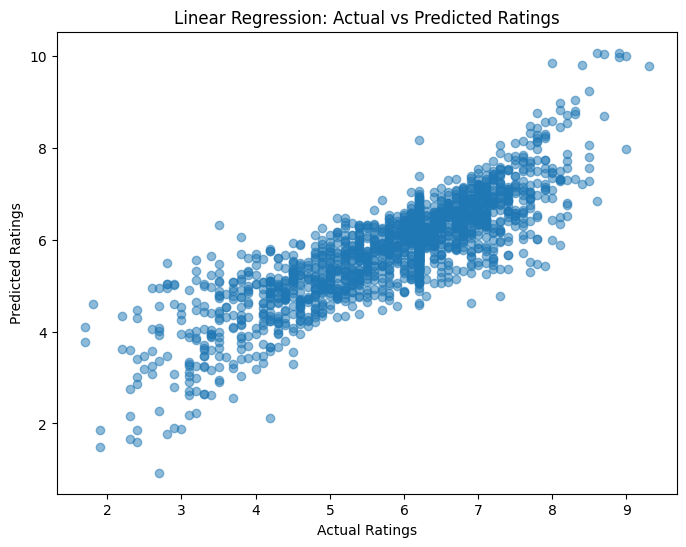

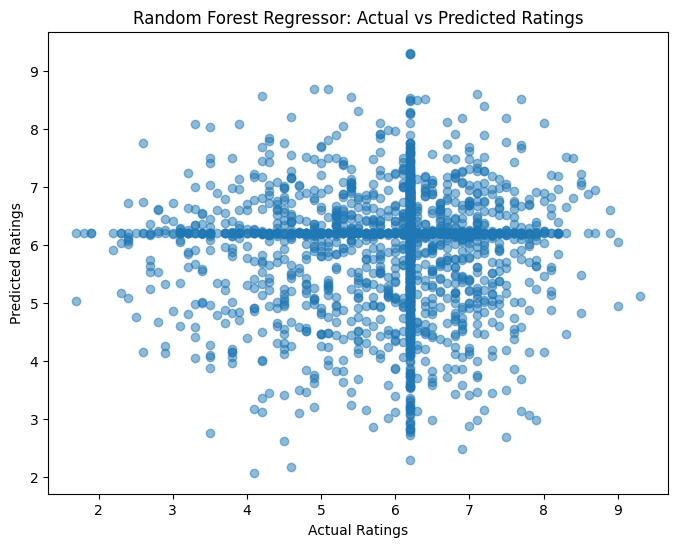

In [289]:
import matplotlib.pyplot as plt

# Scatter plot for Linear Regression predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_pred, alpha=0.5)
plt.title('Linear Regression: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

# Scatter plot for Random Forest Regressor predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.title('Random Forest Regressor: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()
